In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
import shutil


In [39]:
%matplotlib inline
image_path = r"../../data/raw/train/1603340031_page_1.png"
image = cv2.imread(image_path)


In [40]:
bbox = pd.read_fwf(r"../../data/raw/train/1603340031_page_1.txt", header=None).values[0]
bbox


array([0.      , 0.689869, 0.930403, 0.059477, 0.037444])

In [41]:
def add_alpha_channel(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)
    return image

def remove_icon_from_coords(image, coords):
    x1, y1, x2, y2 = coords

    image[y1:y2, x1:x2, 3] = 0
    return image
    


In [42]:
def convert_yolo_to_pixel(bbox, image_shape):
    h, w = image_shape[:2]
    cls, x_center, y_center, width, height = bbox
    x1 = int((x_center - width / 2) * w)
    y1 = int((y_center - height / 2) * h)
    x2 = int((x_center + width / 2) * w)
    y2 = int((y_center + height / 2) * h)
    return x1, y1, x2, y2

x1, y1, x2, y2 = convert_yolo_to_pixel(bbox, image.shape)
coords = (x1, y1, x2, y2)
image = add_alpha_channel(image)


In [44]:
cropped = image[y1:y2, x1:x2]
plt.imshow(cropped)
cv2.imwrite("label.png", cropped)

True

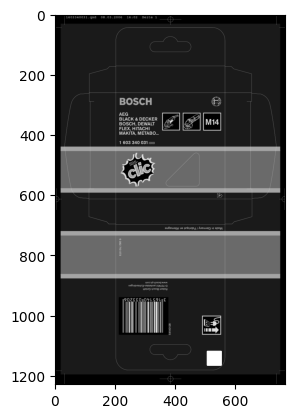

In [32]:

image = remove_icon_from_coords(image, coords)
cv2.rectangle(image, (x1, y1), (x2, y2), color=(255, 255, 255), thickness=2)
plt.imshow(image)
plt.show()
